In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data = read_data()
d00 = pd.concat([data['2000'][key] for key in data['2000'].keys()], axis=1)
d00.head()

,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,
48021950100,73599.981153,3.617289,0.861927,723.087018,153375.729370,0.983089
48021950200,67668.904461,3.154098,0.675920,752.448335,118748.232408,0.967152
48021950300,78678.935400,3.669384,0.810971,808.205215,178808.676101,0.970323
48021950400,75438.539903,4.075207,0.766053,869.478211,158917.899778,0.983405
48021950600,67172.153161,3.465056,0.889213,737.822784,134719.422878,0.968913


In [3]:
def read_data():
    #read the pickled data
    pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
    data = pickle.load(pickle_in)

    #This copy will hold the inflation adjusted values
    data_short = data.copy()

    #the scorers for monetary variables is the middle value of the bin with assumed
    #values for the uppermost bin
    income_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5,
                              55, 67.5, 87.5, 112.5, 137.5, 175, 300]) * 1000
    rent_scorer = np.array([50, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575,
                            625, 675, 725, 775, 850, 950, 1125, 1375, 1750, 2500])
    value_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 27.5, 45, 55, 65, 75, 
                             85, 95, 112.5, 137.5, 162.5, 187.5, 225, 275, 350, 450, 
                             625, 875, 1500]) * 1000
    #education gets a simple 1-8 score
    education_scorer = np.arange(1, 8)

    #to adjust the values to 2016 dollars, the index are adjusted by the 
    #yearly average consumer price index 
    inflation_correction = np.array([1.39422697, 1.11865482, 1.10084296, 1.06686838,
                                     1.04536021, 1.03039158, 1.01380104, 1.01263642, 
                                     1.00000000])

    #these are special cases and need to be dropped (make description below)
    to_drop = [48453980000, 48453002319, 48453001606]

    for i, year in enumerate(data.keys()):
        for key in data[year].keys():
            tmp = data[year][key]
            #bust out the total population and total households from the race and families df
            if key == 'race':
                population = tmp['total_population'].to_frame()
            if key == 'unemployment':
                tmp['employed'] = tmp['total_in_labor_force'] - tmp['unemployed']
            #if key == 'families':
            #    households = tmp['total_households'].to_frame()
            #convert columns to percentages and drop the total
            tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
            #calculate the index (single number to represent bins) 
            if len(tmp.columns) > 1:
                if key == 'income':
                    tmp['income_index'] = tmp.dot(income_scorer) * inflation_correction[i]
                elif key == 'rent':
                    tmp['rent_index'] = tmp.dot(rent_scorer) * inflation_correction[i]
                elif key == 'value':
                    tmp['value_index'] = tmp.dot(value_scorer) * inflation_correction[i]
                elif key == 'education':
                    tmp['education_index'] = tmp.dot(education_scorer)
            #put the new percentage dataframe back in
            #data[year][key] = tmp.drop(to_drop)
            data[year][key] = tmp[tmp.columns[-1]].copy().drop(to_drop).to_frame()
    return data

In [8]:
d00 = pd.concat([data['2000'][key] for key in data['2000'].keys()], axis=1)
d09 = pd.concat([data['2009'][key] for key in data['2009'].keys()], axis=1)

pd.concat([d00, d09])

all_data = pd.concat([pd.concat([data[year][key] for key in data[year].keys()], axis=1) for year in data.keys()])

In [12]:
all_data.describe()

,income_index,education_index,white_alone,rent_index,value_index,employed
count,3123.000000,3123.000000,3123.000000,3123.000000,3.123000e+03,3123.000000
mean,84262.741429,4.476961,0.762018,1191.607807,2.469967e+05,0.937482
std,35110.369293,0.864527,0.151721,318.853565,1.456144e+05,0.037875
min,13706.377011,2.288828,0.124507,0.000000,0.000000e+00,0.674997
25%,59634.704778,3.805184,0.672449,979.953097,1.544547e+05,0.919809
50%,77039.621725,4.553825,0.799637,1134.838220,2.034804e+05,0.944018
75%,100417.762708,5.143958,0.874709,1347.287376,2.913233e+05,0.963034
max,251933.727125,6.272527,0.992427,3153.470306,1.079152e+06,1.000000


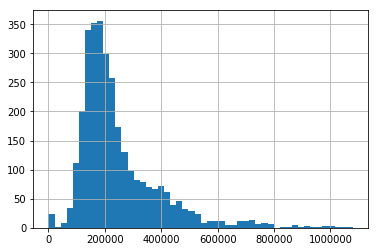

In [17]:
all_data['value_index'].hist(bins=50)

In [14]:
all_data[all_data['value_index'] == 0]

,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,
48453000203,65192.850374,6.002611,0.828641,1745.857691,0.0,0.959688
48453000601,15664.745267,5.181176,0.630958,1347.243792,0.0,0.841052
48453000203,49401.567518,3.503208,0.747225,1695.356011,0.0,0.971059
48453000601,14683.551482,4.612836,0.647487,1288.740873,0.0,0.860969
48453001753,69946.780345,5.603933,0.682107,1112.458318,0.0,0.958451
48453000203,57982.768197,5.731629,0.814275,1704.187605,0.0,0.967279
48453000601,15195.180653,4.225000,0.678606,1349.516899,0.0,0.674997
48453001753,71467.836454,5.444444,0.705584,1111.635269,0.0,0.970976
48453000203,72739.056946,5.545788,0.842959,1708.497296,0.0,0.967836


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

all_scaled = pd.DataFrame(scaler.fit_transform(all_data), index=all_data.index, columns=all_data.columns)

wcss = []

for i in range(10):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(all_scaled)
    wcss.append(kmeans.inertia_)

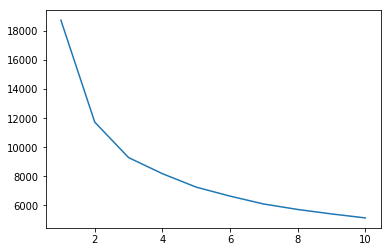

In [27]:
plt.plot(range(1, 11), wcss)

In [22]:
all_scaled.describe()

,income_index,education_index,white_alone,rent_index,value_index,employed
count,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03
mean,4.065130e-17,1.137596e-18,9.662460e-16,-4.430583e-16,4.696140e-17,-2.964647e-15
std,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00
min,-2.009881e+00,-2.531423e+00,-4.202546e+00,-3.737762e+00,-1.696509e+00,-6.931418e+00
25%,-7.015586e-01,-7.771712e-01,-5.904487e-01,-6.639054e-01,-6.356295e-01,-4.666847e-01
50%,-2.057591e-01,8.892251e-02,2.479851e-01,-1.780713e-01,-2.988940e-01,1.725971e-01
75%,4.601948e-01,7.716397e-01,7.428748e-01,4.883260e-01,3.044597e-01,6.747347e-01
max,4.776305e+00,2.077267e+00,1.518880e+00,6.153849e+00,5.715703e+00,1.650901e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116c6fa58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116d53320>]], dtype=object)

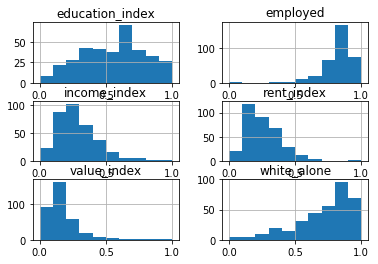

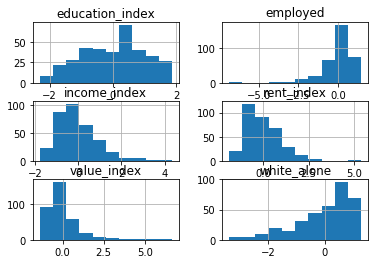

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss = StandardScaler()
mm = MinMaxScaler(feature_range=(0, 1))
d00mm = pd.DataFrame(mm.fit_transform(d00), index=d00.index, columns=d00.columns)
d00ss = pd.DataFrame(ss.fit_transform(d00), index=d00.index, columns=d00.columns)
d00mm.hist()
d00ss.hist()

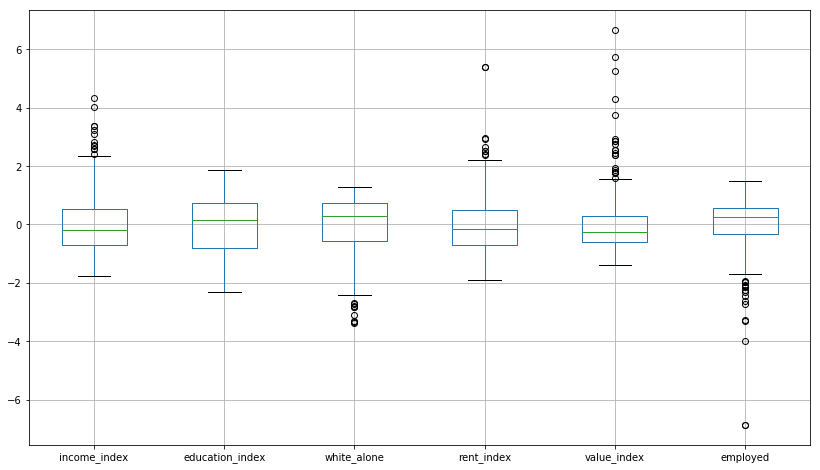

In [7]:
#d00mm.boxplot(figsize=(14, 8))
d00ss.boxplot(figsize=(14, 8))

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(10):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(d00ss)
    wcss.append(kmeans.inertia_)

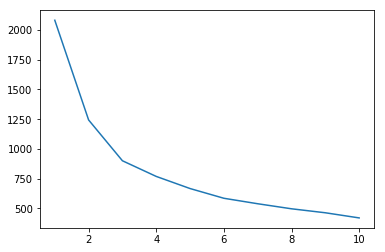

In [9]:
plt.plot(range(1, 11), wcss)

In [10]:
import scipy.cluster.hierarchy as sch

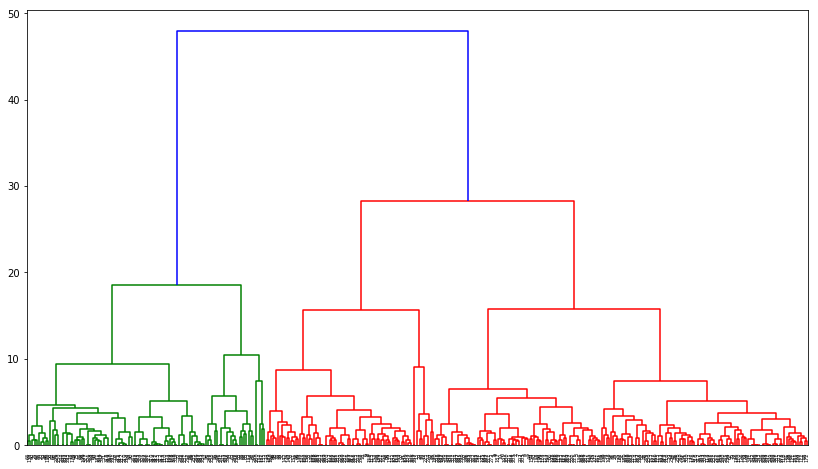

In [22]:
plt.figure(figsize=(14, 8))
dend = sch.dendrogram(sch.linkage(d00ss, method='ward'))

In [12]:
km5 = KMeans(n_clusters=5)
km5.fit(d00mm)
clust_pred = km5.predict(d00mm)

In [13]:
for i in range(5):
    print(d00ss[clust_pred == i].shape)

(74, 6)
(100, 6)
(67, 6)
(88, 6)
(18, 6)


In [14]:
d00ss['cluster'] = clust_pred

In [15]:
d00ss.head()

,income_index,education_index,white_alone,rent_index,value_index,employed,cluster
geoid,,,,,,,
48021950100,-0.470455,-0.796281,0.670595,-1.279726,-0.435683,0.540546,0
48021950200,-0.630491,-1.324239,-0.346698,-1.199000,-0.724041,-0.342836,0
48021950300,-0.333412,-0.736901,0.391910,-1.045703,-0.223892,-0.167035,0
48021950400,-0.420846,-0.274333,0.146251,-0.877241,-0.389531,0.558065,0
48021950600,-0.643894,-0.969800,0.819825,-1.239211,-0.591042,-0.245182,0


In [16]:
d00ss.groupby('cluster').mean()

,income_index,education_index,white_alone,rent_index,value_index,employed
cluster,,,,,,
0,-0.440827,-0.771094,0.079210,-0.708196,-0.453212,0.106976
1,-0.201760,0.380941,0.146113,0.007649,-0.144193,0.005876
2,-0.959923,-1.296915,-1.638728,-0.786317,-0.849627,-1.019891
3,0.779630,0.864881,0.813256,0.795937,0.575944,0.548083
4,2.694704,1.652807,0.986409,1.904582,3.011055,0.644311


In [17]:
d00['clusters'] = clust_pred
d00.groupby('clusters').mean()

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,74698.016930,3.639386,0.753795,930.962856,151270.761512,0.975267
1,83558.049829,4.650095,0.766028,1191.328954,188379.277065,0.973443
2,55459.813837,3.178071,0.439678,902.548932,103667.177090,0.954937
3,119929.307214,5.074667,0.888012,1478.043974,274857.006347,0.983225
4,190903.794265,5.765934,0.919672,1881.278957,567277.533488,0.984961


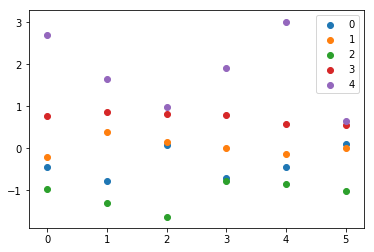

In [24]:
for i in range(5):
    plt.scatter(range(6), d00ss.groupby('cluster').mean().iloc[i], label=i)
plt.legend()

In [25]:
km3 = KMeans(n_clusters=3)
clust_pred3 = km3.fit_predict(d00ss)

In [26]:
d00['clusters'] = clust_pred3
d00ss['clusters'] = clust_pred3
d00.groupby('clusters').mean()

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,131981.578600,5.192052,0.893388,1546.517839,324513.322277,0.983519
1,55203.135320,3.202147,0.444785,902.638478,104183.644553,0.954152
2,80031.517695,4.216814,0.760674,1081.592536,172792.931178,0.974638


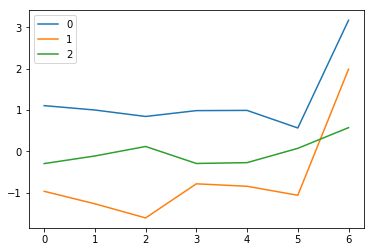

In [30]:
for i in range(3):
    plt.plot(range(7), d00ss.groupby('clusters').mean().iloc[i], label=i)
plt.legend()

In [31]:
clust_df = pd.DataFrame(index=d00.index)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500)
ss = StandardScaler()
for year in data.keys():
    tmp = pd.concat([data[year][key] for key in data[year].keys()], axis=1)
    tmpss = pd.DataFrame(ss.fit_transform(tmp), index=tmp.index, columns=tmp.columns)
    clust_pred = kmeans.fit_predict(tmpss)
    tmp['clusters'] = clust_pred
    tmpss['clusters'] = clust_pred
    clust_df[year] = clust_pred
    display(year, tmp.groupby('clusters').mean())
    display(tmpss.groupby('clusters').mean().sum(axis=1))
    

'2000'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,173635.504934,5.553027,0.911389,1836.363820,473656.103493,0.984219
1,56306.281527,3.213116,0.472919,890.868028,106651.852521,0.955958
2,110083.726155,4.944008,0.853238,1411.697067,243094.032747,0.983523
3,78003.589830,4.208924,0.770406,1047.632043,173191.796947,0.973455


clusters
0    9.195698
1   -6.257458
2    3.342585
3   -0.955030
dtype: float64

'2009'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,70669.125161,4.201577,0.703188,1089.480864,187643.239813,0.935376
1,103201.957625,5.047554,0.844907,1275.694256,301383.344961,0.956556
2,163579.609028,5.720524,0.882718,1718.557287,593322.974587,0.962266
3,48828.288976,3.335661,0.504117,906.354833,135776.287872,0.898603


clusters
0   -1.439099
1    3.354217
2    9.778862
3   -6.323516
dtype: float64

'2010'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,48615.946444,3.377114,0.495075,953.744343,138603.140930,0.894153
1,101814.302603,5.060912,0.840510,1334.360210,311708.007934,0.955401
2,69862.154515,4.246291,0.730310,1061.236902,189966.182056,0.933356
3,167005.667536,5.799243,0.883742,1672.974695,616604.861813,0.957706


clusters
0   -6.033593
1    3.341241
2   -1.343499
3    9.344086
dtype: float64

'2011'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,69953.886003,4.234635,0.737892,1075.717154,183627.701529,0.931838
1,155219.957514,5.681912,0.879188,1709.627920,551416.398819,0.958716
2,98249.016230,5.083084,0.853277,1277.036091,298763.673019,0.947393
3,48064.830628,3.454427,0.534704,954.830454,146117.546684,0.881402


clusters
0   -1.354397
1    8.506076
2    2.839726
3   -5.875882
dtype: float64

'2012'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,155762.703742,5.750420,0.875854,1651.164079,573869.301366,0.956290
1,66265.017220,4.131014,0.743891,1052.507926,179127.796660,0.928285
2,97276.493765,5.081841,0.859599,1309.591472,293282.006691,0.942086
3,47159.013807,3.457303,0.573273,967.219032,139921.012840,0.862714


clusters
0    8.786793
1   -1.809099
2    2.897042
3   -6.426676
dtype: float64

'2013'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,100441.814099,5.165415,0.861922,1350.157837,306531.347339,0.938928
1,51312.941129,3.550101,0.619789,984.645787,143874.046077,0.891421
2,71587.652003,4.357004,0.807961,1077.837063,192021.640035,0.929314
3,155232.757245,5.763831,0.872823,1708.697979,583048.300865,0.952815


clusters
0    3.251033
1   -5.458692
2   -0.865006
3    9.040034
dtype: float64

'2014'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,68053.097236,4.236646,0.802643,1077.633392,181904.794810,0.937123
1,154183.690123,5.774223,0.862578,1703.131457,603778.605145,0.953826
2,102246.221928,5.197211,0.862074,1320.377815,314173.768833,0.943687
3,51951.442984,3.578307,0.632753,973.202672,155076.781732,0.893535


clusters
0   -1.265972
1    8.761960
2    3.161726
3   -5.604250
dtype: float64

'2015'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,57352.817820,3.691514,0.679317,997.373451,151268.637290,0.938420
1,85573.686652,4.810818,0.834848,1229.546308,245013.485345,0.951718
2,59969.208512,3.986426,0.777590,1078.135940,195306.469566,0.876617
3,135883.267402,5.573811,0.873355,1591.848853,456883.615530,0.953808


clusters
0   -4.261467
1    1.039226
2   -4.209306
3    6.536072
dtype: float64

'2016'

,income_index,education_index,white_alone,rent_index,value_index,employed
clusters,,,,,,
0,88222.748679,4.845399,0.840400,1268.546403,259692.227621,0.957556
1,63627.822667,4.007494,0.798997,1103.298944,196880.616470,0.899371
2,136779.405247,5.577297,0.866385,1612.370461,475460.212174,0.958462
3,60032.362512,3.797092,0.683606,1049.261879,164993.716388,0.950648


clusters
0    1.171476
1   -3.885819
2    6.409408
3   -3.931223
dtype: float64

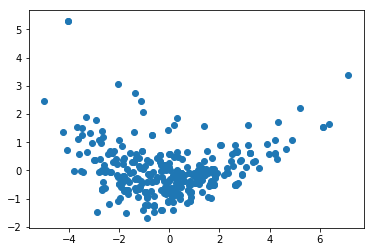

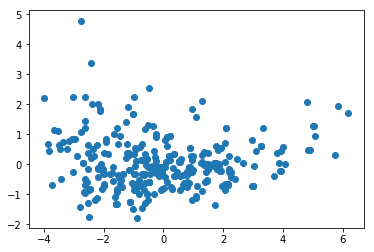

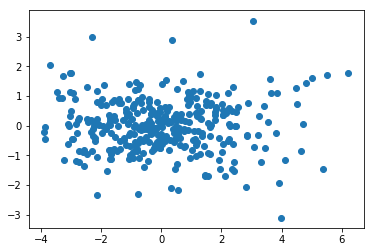

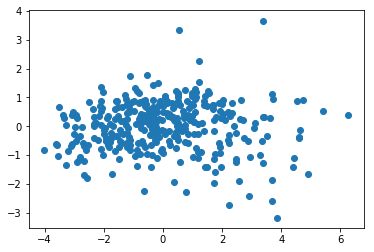

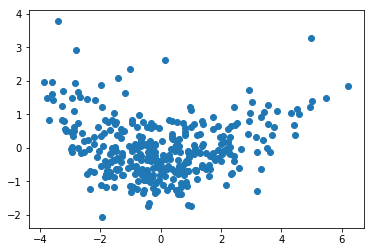

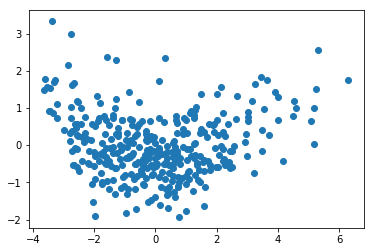

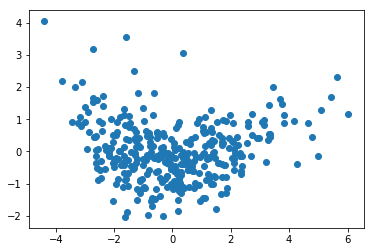

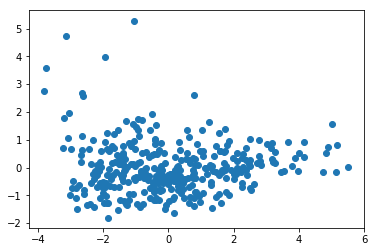

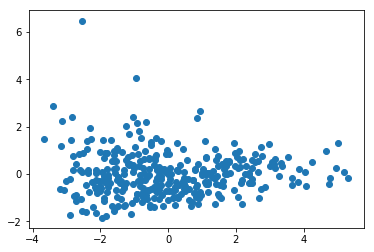

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
kmeans = KMeans(n_clusters=4)
for year in data.keys():
    tmp = pd.concat([data[year][key] for key in data[year].keys()], axis=1)
    tmpss = pd.DataFrame(ss.fit_transform(tmp), index=tmp.index, columns=tmp.columns)
    tmppca = pca.fit_transform(tmpss)
    clust_pred = kmeans.fit_predict(tmpss)
    plt.figure()
    plt.scatter(tmppca[:,0], tmppca[:,1])

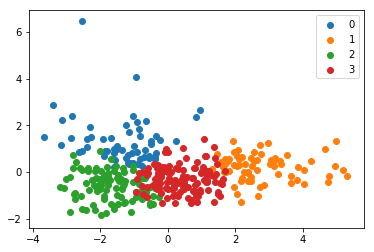

In [29]:
for i in range(4):
    plt.scatter(tmppca[clust_pred == i][:, 0], tmppca[clust_pred == i][:, 1], label=i)
plt.legend()

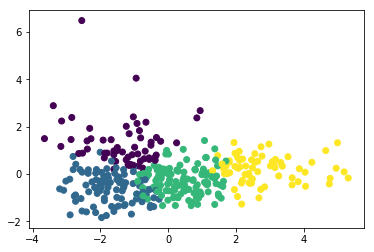

In [34]:
plt.scatter(tmppca[:, 0], tmppca[:, 1], c=clust_pred)

In [35]:
from sklearn.pipeline import make_pipeline

d

scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

In [40]:
d00.head()

,income_index,education_index,white_alone,rent_index,value_index,employed,clusters
geoid,,,,,,,
48021950100,73599.981153,3.617289,0.861927,723.087018,153375.729370,0.983089,2
48021950200,67668.904461,3.154098,0.675920,752.448335,118748.232408,0.967152,2
48021950300,78678.935400,3.669384,0.810971,808.205215,178808.676101,0.970323,2
48021950400,75438.539903,4.075207,0.766053,869.478211,158917.899778,0.983405,2
48021950600,67172.153161,3.465056,0.889213,737.822784,134719.422878,0.968913,2


In [36]:
pipeline.fit(d00)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [38]:
clust_pred = pipeline.predict(d00ss)

In [39]:
d00ss.head()

,income_index,education_index,white_alone,rent_index,value_index,employed,cluster,clusters
geoid,,,,,,,,
48021950100,-0.470455,-0.796281,0.670595,-1.279726,-0.435683,0.540546,0,2
48021950200,-0.630491,-1.324239,-0.346698,-1.199000,-0.724041,-0.342836,0,2
48021950300,-0.333412,-0.736901,0.391910,-1.045703,-0.223892,-0.167035,0,2
48021950400,-0.420846,-0.274333,0.146251,-0.877241,-0.389531,0.558065,0,2
48021950600,-0.643894,-0.969800,0.819825,-1.239211,-0.591042,-0.245182,0,2
